## Quantum Computing - Exploration

In [1]:
import numpy as np
from qiskit import *

### First, create a quantum circuit with 3 qubits.

In [2]:
circ = QuantumCircuit(3)

This circuit provides the basis for the quantum calculation's we'll do later. Essentially, this is the statevector. Let's perform some gate operations on this circuit to create a GHZ statevector.

In [3]:
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)

Awesome! Now let's visualize this state circuit.

In [4]:
circ.draw()

Now that we have a quantum circuit set up, let's use a package to simulate it. This package is Qiskit Aer. To start the simulation, we need to choose a backend (section of Aer we want to use).

In [5]:
backend = Aer.get_backend('statevector_simulator')

Below I go through the commands to get the quantum state from a given circuit.
1. execute a circuit on a backend simulation, which returns a job object
2. take the result of that given job object and pul the statevector from that result.

This returns a statevector of dimension $2^n$, where n is the number of qubits.

In [6]:
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ,decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


Let's visualize this state.

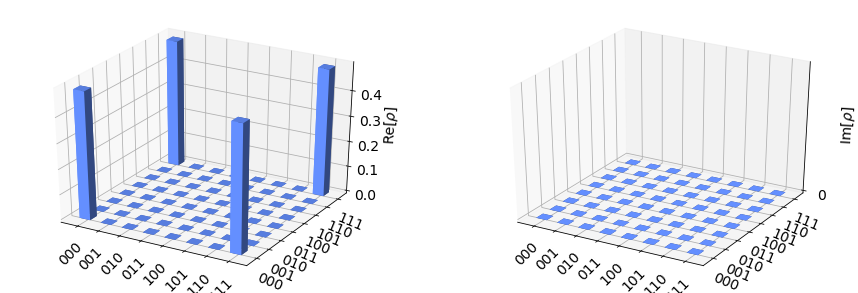

In [7]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

Interpreting this output can be pretty difficult. These are the real and imaginary state density matrices, from which the probability of any measurment can be asertained.

### Next up: Unitary Simulations

Aer also has a unitary simulator for use in calculations where all the elements in the circuit are unitary operations. The unitary simulator returns a $2^n x 2^n$ matrix.

[[ 0.707+0.j  0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j  0.707+0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]]


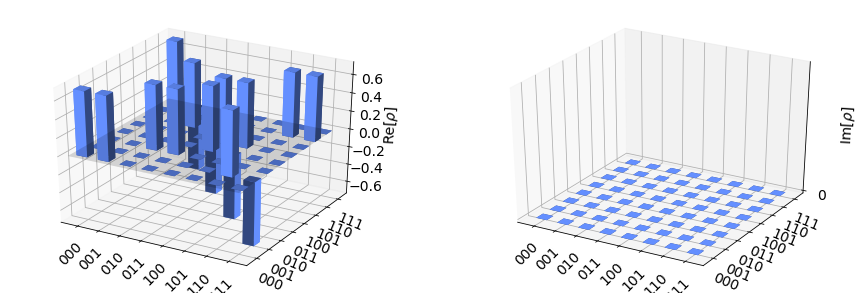

In [8]:
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()
print(result.get_unitary(circ,decimals=3))
plot_state_city(result.get_unitary(circ,decimals=3))

### Measurment Simulations

Yet another Aer backend is available to simulate actual measurments, not simply ideal/theoretical information on the state that the previous backends gave us.

In [9]:
meas = QuantumCircuit(3,3)
meas.barrier(range(3))

#This next line maps the quantum measurment to classical bits
meas.measure(range(3),range(3))

qc = circ+meas

qc.draw()

To simulate the circuit, we use the qasm simulator in Aer. Each run of this GHZ circuit will yield either 000 or 111. We can use the execute command to build up statistics on the distribution of these results.

In [10]:
backend_sim = Aer.get_backend('qasm_simulator')

job_sim = execute(qc,backend_sim,shots=1024)
result_sim = job_sim.result()

counts = result_sim.get_counts(qc)
print(counts)

{'000': 504, '111': 520}


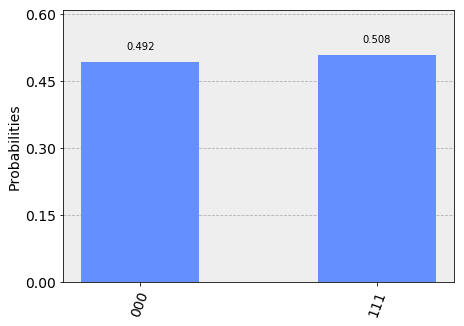

In [11]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

### IBM Q

Qiskit is supported by IBM, and we can use IBM's public quantum computers and API to test our code!

In [12]:
from qiskit import IBMQ

In [36]:
IBMQ.save_account('caa130bd16fc8c10d09c1e18bf99e63d1285cbe215c8b82ed6c30cc5997077238a2908271e30cc407577d4d34bd400fbabe66a90c959be45f8269f891cc645c9', overwrite = True)

In [13]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [14]:
IBMQ.providers()
provider = IBMQ.get_provider(group='open')

In [15]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [16]:
backend = provider.get_backend('ibmqx2')

In [42]:
from qiskit.tools.monitor import job_monitor

job_exp = execute(qc,backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


In [43]:
result_exp = job_exp.result()

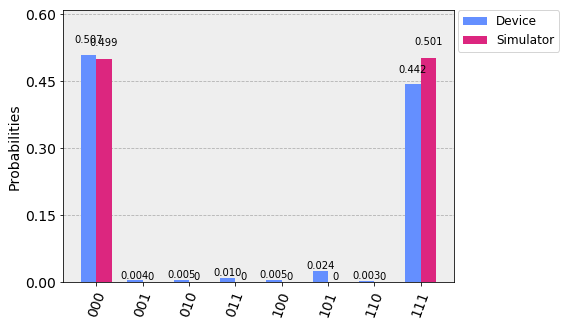

In [45]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts], legend=['Device','Simulator'])

## Part 4 - Characteristics of Quantum Circuits

In [17]:
#create a 12 qubit circuit
qc = QuantumCircuit(12)

#run a hadamard gate on each of the first five, and put each of the results of these into a bell state (through a c-not gate) with the subsequent 5 qubits.
for idx in range(5):
    qc.h(idx)
    qc.cx(idx, idx+5)

#q1 is also in a bell state to q7
qc.cx(1, 7)
#simply NOT q8
qc.x(8)
#etc
qc.cx(1, 9)
qc.x(7)
qc.cx(1, 11)

qc.swap(6, 11)
qc.swap(6, 9)
qc.swap(6, 10)
qc.x(6)
qc.draw()

In [18]:
#we can get the number of gates or operations performed on the qubits by using:
print(qc.count_ops())
#or, for total:
print(qc.size())

OrderedDict([('cx', 8), ('h', 5), ('x', 3), ('swap', 3)])
19


The performance of a quantum circuit can roughly trace back to the number of layers it has, or its "depth". This is generally the number of operations the computer needs to perform in sequence. This doesn't add to the count any operations that can be performed in parallel.

In [19]:
qc.depth()

9

We can also get the maximum number of individual circuits this calculation could be broken down to. This is especially useful for simplifying complicated circuits.

In [20]:
qc.num_unitary_factors()

3

Let's take the circuit above and add classical registers!

In [21]:
qc2 = QuantumCircuit(12, 12)

for idx in range(5):
    qc2.h(idx)
    qc2.cx(idx, idx+5)

qc2.cx(1, 7)
qc2.x(8)
qc2.cx(1, 9)
qc2.x(7)
qc2.cx(1, 11)
qc2.swap(6, 11)
qc2.swap(6, 9)
qc2.swap(6, 10)
qc2.x(6)
qc2.barrier()
qc2.measure(range(12), range(12))
qc2.draw()

It's also useful to see that some gates, such as the SWAP gate, is not actually an atomic operation. This can be seen using the decompose function:

In [22]:
qc3 = QuantumCircuit(2)
qc3.swap(0,1)
qc3.decompose().draw() # This decomposes the swap gate into the gates we want

## Part 5 - Let's introduce the Transpiler

In [23]:
from qiskit.visualization import plot_gate_map, plot_circuit_layout
import matplotlib.pyplot as plt

Consider this 5 qubit GHZ state circuit:

In [24]:
ghz = QuantumCircuit(5, 5)
ghz.h(0)
for idx in range(1,5):
    ghz.cx(0,idx)
ghz.barrier(range(5))
ghz.measure(range(5), range(5))
ghz.draw()

Before we go further into learning how transpile() affects this circuit, let's introduce a way to understand some of the obscure quantum computing functions.

In [25]:
import inspect
#This shows all the default parameters for the transpile function.
inspect.signature(transpile)

<Signature (circuits, backend=None, basis_gates=None, coupling_map=None, backend_properties=None, initial_layout=None, seed_transpiler=None, optimization_level=None, pass_manager=None, callback=None, output_name=None)>

In [26]:
inspect.signature(QuantumCircuit)

<Signature (*regs, name=None)>

In [27]:
qc = QuantumCircuit(2, 1)

qc.h(0)
qc.x(1)
qc.cu1(np.pi/4, 0, 1)
qc.h(0)
qc.measure([0], [0])
qc.draw()

In the above circuit, we see we have an H, X, and U1 gate. None of these are basis gates. Let's decompose the circuit:

In [28]:
qc_basis = qc.decompose()
qc_basis.draw()

Let's look at another example: the Tofolli gate, a controlled-controlled-not gate. This is a 3 qubit gate!

In [29]:
ccx_circ = QuantumCircuit(3)
ccx_circ.ccx(0, 1, 2)
ccx_circ.draw()

In [30]:
ccx_circ.decompose().draw()

Wow! This is a big decomposition.

We also want to be able to map the circuit, which is entirely virtual, to physical qubits on specific providers. This is done with the plot_gate_map tool

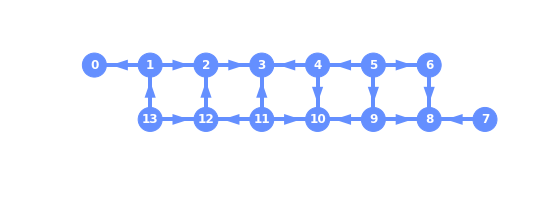

In [31]:
backend = provider.get_backend('ibmq_16_melbourne')
plot_gate_map(backend, plot_directed=True)

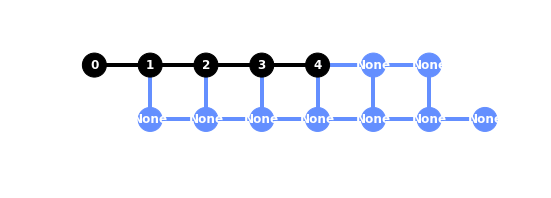

In [32]:
backend = provider.get_backend('ibmq_16_melbourne')
new_circ_lv0 = transpile(ghz, backend=backend, optimization_level=0)

plot_circuit_layout(new_circ_lv0, backend)

Depth: 14


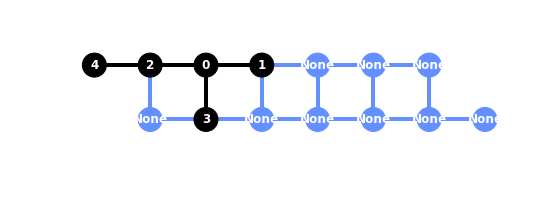

In [33]:
backend = provider.get_backend('ibmq_16_melbourne')
new_circ_lv3 = transpile(ghz, backend=backend, optimization_level=3)

print('Depth:', new_circ_lv3.depth())
plot_circuit_layout(new_circ_lv3, backend)

With these three layouts, we can choose between them and execute one. This step of transpiling is typically done within the execute function.

In [34]:
from qiskit.tools.monitor import job_monitor

In [39]:
job1 = execute(new_circ_lv3, backend)
job_monitor(job1)

Job Status: job has successfully run


From the initial chart, we can choose our own initial mapping if we want. Here's two examples of using this level of control:

Depth: 13


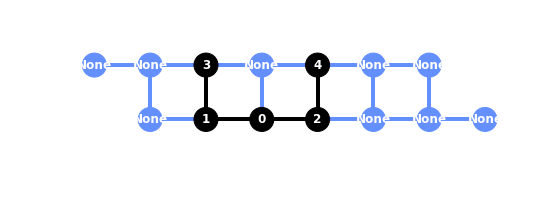

In [35]:
# Virtual -> physical
#    0    ->    11
#    1    ->    12
#    2    ->    10
#    3    ->    2
#    4    ->    4

good_ghz = transpile(ghz, backend, initial_layout=[11,12,10,2,4])
print('Depth:', good_ghz.depth())
plot_circuit_layout(good_ghz, backend)

In [41]:
job2 = execute(good_ghz, backend)
job_monitor(job2)

Job Status: job has successfully run


Depth: 54


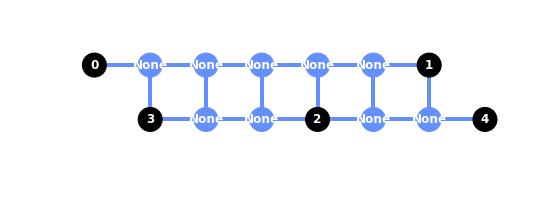

In [36]:
# Virtual -> physical
#    0    ->    0
#    1    ->    6
#    2    ->    10
#    3    ->    13
#    4    ->    7

bad_ghz = transpile(ghz, backend, initial_layout=[0,6,10,13,7])
print('Depth:', bad_ghz.depth())
plot_circuit_layout(bad_ghz, backend)

In [43]:
job3 = execute(bad_ghz, backend)
job_monitor(job3)

Job Status: job has successfully run


In [44]:
counts1 = job1.result().get_counts()
counts2 = job2.result().get_counts()
counts3 = job3.result().get_counts()

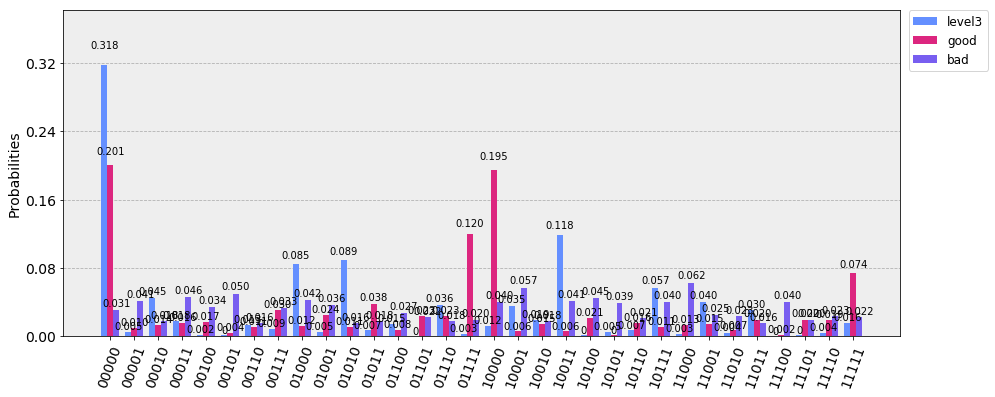

In [45]:
plot_histogram([counts1, counts2, counts3],
               figsize=(15,6),
               legend=['level3', 'good', 'bad'])

Different provider devices also change the topology of the circuit depending on the entanglement they support! This can be further explored in the transpiling tutorial; but I'm gunna move on.

## Intro to Qiskit Terra:

In [41]:
from math import pi
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

## Single Qubit Quantum states

A single qubit quantum state can be written as

$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta \left|1\right\rangle$$


where $\alpha$ and $\beta$ are complex numbers. In a measurement the probability of the bit being in $\left|0\right\rangle$ is $|\alpha|^2$ and $\left|1\right\rangle$ is $|\beta|^2$. As a vector this is

$$
\left|\psi\right\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

Note due to conservation probability $|\alpha|^2+ |\beta|^2 = 1$ and since global phase is undetectable $\left|\psi\right\rangle := e^{i\delta} \left|\psi\right\rangle$ we only requires two real numbers to describe a single qubit quantum state.

A convenient representation is

$$\left|\psi\right\rangle = \cos(\theta/2)\left|0\right\rangle + \sin(\theta/2)e^{i\phi}\left|1\right\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  From this it is clear that there is a one-to-one correspondence between qubit states ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). This is called the Bloch sphere representation of a qubit state.

Quantum gates/operations are usually represented as matrices. A gate which acts on a qubit is represented by a $2\times 2$ unitary matrix $U$. The action of the quantum gate is found by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$\left|\psi'\right\rangle = U\left|\psi\right\rangle$$

A general unitary must be able to take the $\left|0\right\rangle$ to the above state. That is 

$$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b 
\end{pmatrix}
$$ 

where $a$ and $b$ are complex numbers constrained such that $U^\dagger U = I$ for all $0\leq\theta\leq\pi$ and $0\leq \phi<2\pi$. This gives 3 constraints and as such $a\rightarrow -e^{i\lambda}\sin(\theta/2)$ and $b\rightarrow e^{i\lambda+i\phi}\cos(\theta/2)$ where $0\leq \lambda<2\pi$ giving 

$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

This is the most general form of a single qubit unitary.

## Single-Qubit Gates

The single-qubit gates available are:
- u gates
- Identity gate
- Pauli gates
- Clifford gates
- $C3$ gates
- Standard rotation gates 

We have provided a backend: `unitary_simulator` to allow you to calculate the unitary matrices.

In [43]:
q = QuantumRegister(1)

In [44]:
qc = QuantumCircuit(q)
qc.u3(pi/2,pi/2,pi/2,q)
qc.draw()

In [45]:
backend = provider.get_backend('ibmqx2')
job = execute(qc,backend)
job.result().get_unitary(qc,decimals=3)

JobError: 'Invalid job state. The job should be DONE but it is JobStatus.ERROR'

### u gates

In Qiskit we give you access to the general unitary using the $u3$ gate

$$
u3(\theta, \phi, \lambda) = U(\theta, \phi, \lambda) 
$$

The $u2(\phi, \lambda) =u3(\pi/2, \phi, \lambda)$ has the matrix form

$$
u2(\phi, \lambda) = 
\frac{1}{\sqrt{2}} \begin{pmatrix}
1 & -e^{i\lambda} \\
e^{i\phi} & e^{i(\phi + \lambda)}
\end{pmatrix}.
$$

This is a useful gate as it allows us to create superpositions

The $u1(\lambda)= u3(0, 0, \lambda)$ gate has the matrix form

$$
u1(\lambda) = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix},
$$

which is a useful as it allows us to apply a quantum phase.

### Pauli gates

#### $X$: bit-flip gate

The bit-flip gate $X$ is defined as:

$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= u3(\pi,0,\pi)
$$

In [ ]:
qc = QuantumCircuit(q)
qc.x(q)
qc.draw()

#### $Y$: bit- and phase-flip gate

The $Y$ gate is defined as:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}=u3(\pi,\pi/2,\pi/2)
$$

#### $Z$: phase-flip gate

The phase flip gate $Z$ is defined as:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=u1(\pi)
$$

### Clifford gates

#### Hadamard gate

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}= u2(0,\pi)
$$

The Hadamard gate acts on a single qubit. It maps the basis state $|0>$ to $\frac{1}{\sqrt 2}(|0> + |1>)$ and $|1>$ to $\frac{1}{\sqrt 2}(|0> - |1>)$, thus it creates a superposition state within a single qubit.

## Multi-Qubit Gates

### Mathematical Preliminaries

The space of quantum computer grows exponential with the number of qubits. For $n$ qubits the complex vector space has dimensions $d=2^n$. To describe states of a multi-qubit system, the tensor product is used to "glue together" operators and basis vectors.

Let's start by considering a 2-qubit system. Given two operators $A$ and $B$ that each act on one qubit, the joint operator $A \otimes B$ acting on two qubits is

$$\begin{equation}
	A\otimes B = 
	\begin{pmatrix} 
		A_{00} \begin{pmatrix} 
			B_{00} & B_{01} \\
			B_{10} & B_{11}
		\end{pmatrix} & A_{01} 	\begin{pmatrix} 
				B_{00} & B_{01} \\
				B_{10} & B_{11}
			\end{pmatrix} \\
		A_{10} 	\begin{pmatrix} 
					B_{00} & B_{01} \\
					B_{10} & B_{11}
				\end{pmatrix} & A_{11} 	\begin{pmatrix} 
							B_{00} & B_{01} \\
							B_{10} & B_{11}
						\end{pmatrix}
	\end{pmatrix},						
\end{equation}$$

where $A_{jk}$ and $B_{lm}$ are the matrix elements of $A$ and $B$, respectively.

Analogously, the basis vectors for the 2-qubit system are formed using the tensor product of basis vectors for a single qubit:
$$\begin{equation}\begin{split}
	\left|{00}\right\rangle &= \begin{pmatrix} 
		1 \begin{pmatrix} 
			1  \\
			0
		\end{pmatrix} \\
		0 \begin{pmatrix} 
			1  \\
			0 
		\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\0 \end{pmatrix}~~~\left|{01}\right\rangle = \begin{pmatrix} 
	1 \begin{pmatrix} 
	0 \\
	1
	\end{pmatrix} \\
	0 \begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\end{split}
\end{equation}$$
    
$$\begin{equation}\begin{split}\left|{10}\right\rangle = \begin{pmatrix} 
	0\begin{pmatrix} 
	1  \\
	0
	\end{pmatrix} \\
	1\begin{pmatrix} 
	1 \\
	0 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}~~~ 	\left|{11}\right\rangle = \begin{pmatrix} 
	0 \begin{pmatrix} 
	0  \\
	1
	\end{pmatrix} \\
	1\begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\1 \end{pmatrix}\end{split}
\end{equation}.$$

Note we've introduced a shorthand for the tensor product of basis vectors, wherein $\left|0\right\rangle \otimes \left|0\right\rangle$ is written as $\left|00\right\rangle$. The state of an $n$-qubit system can described using the $n$-fold tensor product of single-qubit basis vectors. Notice that the basis vectors for a 2-qubit system are 4-dimensional; in general, the basis vectors of an $n$-qubit sytsem are $2^{n}$-dimensional, as noted earlier.

### Basis vector ordering in Qiskit

Within the physics community, the qubits of a multi-qubit systems are typically ordered with the first qubit on the left-most side of the tensor product and the last qubit on the right-most side. For instance, if the first qubit is in state $\left|0\right\rangle$ and second is in state $\left|1\right\rangle$, their joint state would be $\left|01\right\rangle$. Qiskit uses a slightly different ordering of the qubits, in which the qubits are represented from the most significant bit (MSB) on the left to the least significant bit (LSB) on the right (big-endian). This is similar to bitstring representation on classical computers, and enables easy conversion from bitstrings to integers after measurements are performed. For the example just given, the joint state would be represented as $\left|10\right\rangle$. Importantly, _this change in the representation of multi-qubit states affects the way multi-qubit gates are represented in Qiskit_, as discussed below.

The representation used in Qiskit enumerates the basis vectors in increasing order of the integers they represent. For instance, the basis vectors for a 2-qubit system would be ordered as $\left|00\right\rangle$, $\left|01\right\rangle$, $\left|10\right\rangle$, and $\left|11\right\rangle$. Thinking of the basis vectors as bit strings, they encode the integers 0,1,2 and 3, respectively.


### Controlled operations on qubits

A common multi-qubit gate involves the application of a gate to one qubit, conditioned on the state of another qubit. For instance, we might want to flip the state of the second qubit when the first qubit is in $\left|0\right\rangle$. Such gates are known as _controlled gates_. The standard multi-qubit gates consist of two-qubit gates and three-qubit gates. The two-qubit gates are:
- controlled Pauli gates
- controlled Hadamard gate
- controlled rotation gates
- controlled phase gate
- controlled u3 gate
- swap gate

The three-qubit gates are: 
- Toffoli gate 
- Fredkin gate